In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../src/")

from preprocessing import load_data, concat_data

sns.set_theme()

train_data = load_data("train.csv")
test_data = load_data("test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


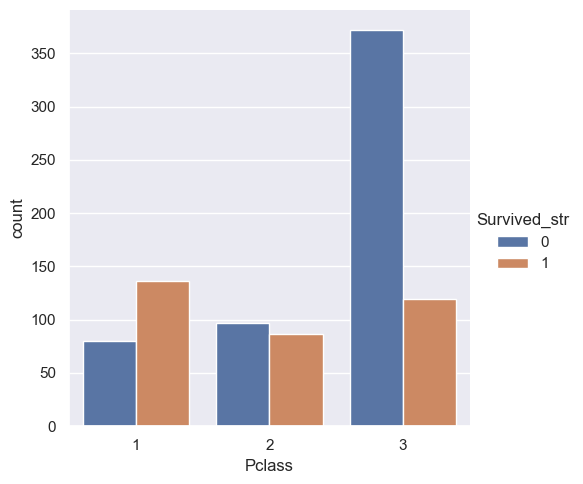

In [89]:
train_data["Survived_str"] = train_data.loc[:, ["Survived"]].map(lambda x: str(x))
sns.catplot(data=train_data, x="Pclass", hue="Survived_str", kind="count")


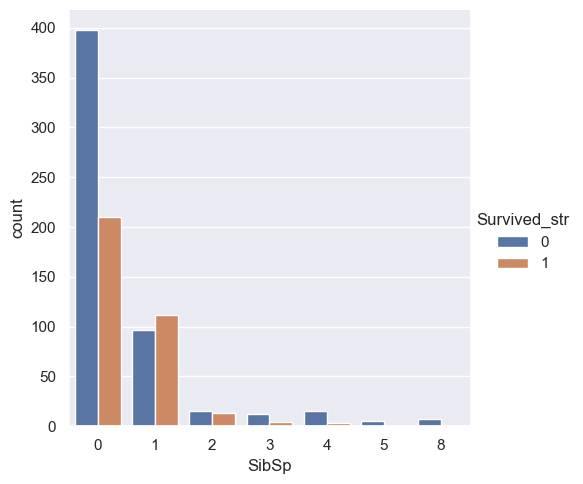

In [90]:
sns.catplot(data=train_data, x="SibSp", hue="Survived_str", kind="count")

In [92]:
concat = concat_data(train_data, test_data)

age_column = concat.loc[:, ["Age"]]
fare_column = concat.loc[:, ["Fare"]]

concat.loc[:, ["Age"]] = age_column.fillna(age_column.mean())
concat.loc[:, ["Fare"]] = fare_column.fillna(fare_column.mean())


concat["new_SibSp"] = concat.loc[:, ["SibSp"]].map(lambda x: 1 if x == 0 else 0)
concat["new_Pclass"] = concat.loc[:, ["Pclass"]].map(lambda x: 1 if x == 3 else 0)

concat = concat.loc[:, ["Age", "Sex", "Fare", "new_SibSp", "new_Pclass"]]
concat = pd.get_dummies(concat, drop_first=True, dtype=int)

target = train_data.loc[:, ["Survived"]]
train_X = concat.iloc[:891]
test_X = concat.iloc[891:]

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4, random_state=0)
model.fit(concat, target)

y_pred = model.predict(test_X)



,Age,Fare,new_SibSp,new_Pclass,Sex_male
0,34.500000,7.8292,1,1,1
1,47.000000,7.0000,0,1,0
2,62.000000,9.6875,1,0,1
3,27.000000,8.6625,1,1,1
4,22.000000,12.2875,0,1,0
...,...,...,...,...,...
413,29.881138,8.0500,1,1,1
414,39.000000,108.9000,1,0,0
415,38.500000,7.2500,1,1,1
416,29.881138,8.0500,1,1,1
